<a href="https://colab.research.google.com/github/kodeklaude/Machine-Learning/blob/master/DataCoLabTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [0]:
import numpy as np

import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving data_co_lab_engineering_dataset.csv to data_co_lab_engineering_dataset.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data_co_lab_engineering_dataset.csv']))

# Data Analysis


In [0]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [0]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


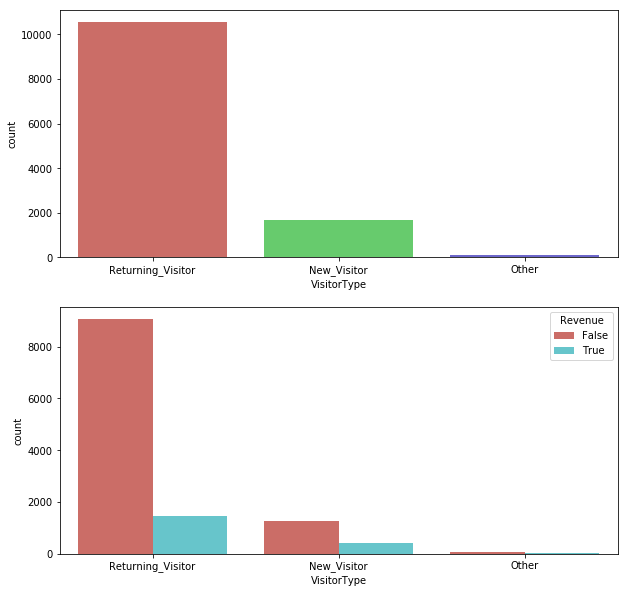

In [0]:
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.countplot(data["VisitorType"],palette="hls",ax=ax[0]);
sns.countplot(data["VisitorType"],hue=data["Revenue"],palette="hls",ax=ax[1]);

New vistors are more likely to make a purchase than returning visitors.

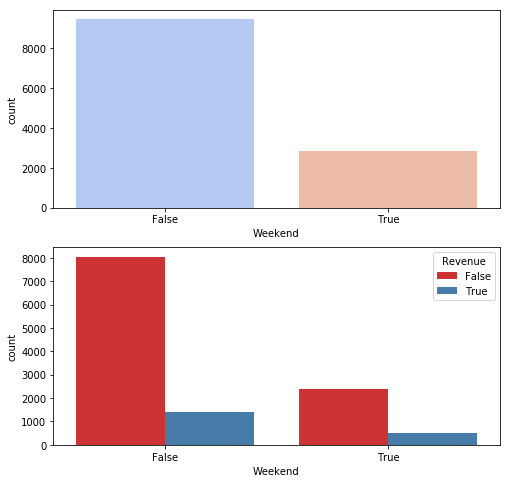

In [0]:
f,ax=plt.subplots(2,1,figsize=(8,8))
sns.countplot(data["Weekend"],palette="coolwarm",ax=ax[0]);
sns.countplot(data["Weekend"],hue=data["Revenue"],palette="Set1",ax=ax[1]);

The probability of purchase on weekends is higher than on normal days.

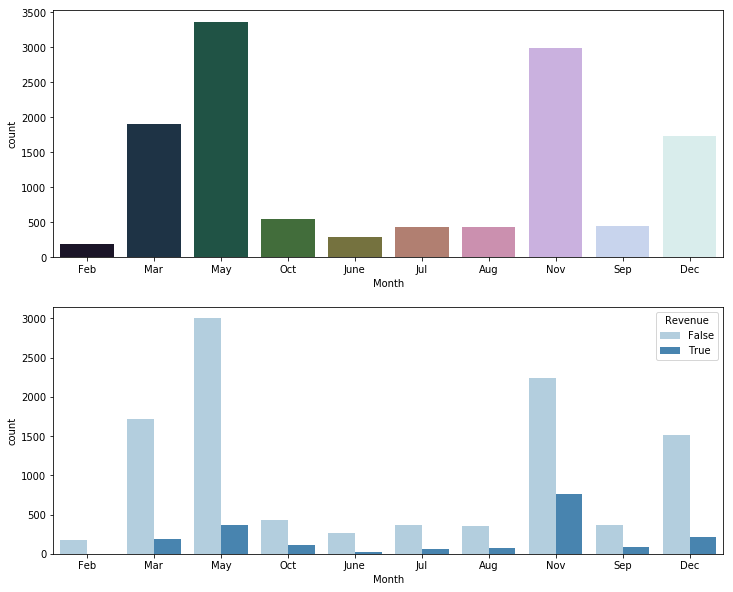

In [0]:
f,ax=plt.subplots(2,1,figsize=(12,10))
sns.countplot(data["Month"],palette="cubehelix",ax=ax[0]);
sns.countplot(data["Month"],hue=data["Revenue"],palette="Blues",ax=ax[1]);

November and May are the best purchase months.


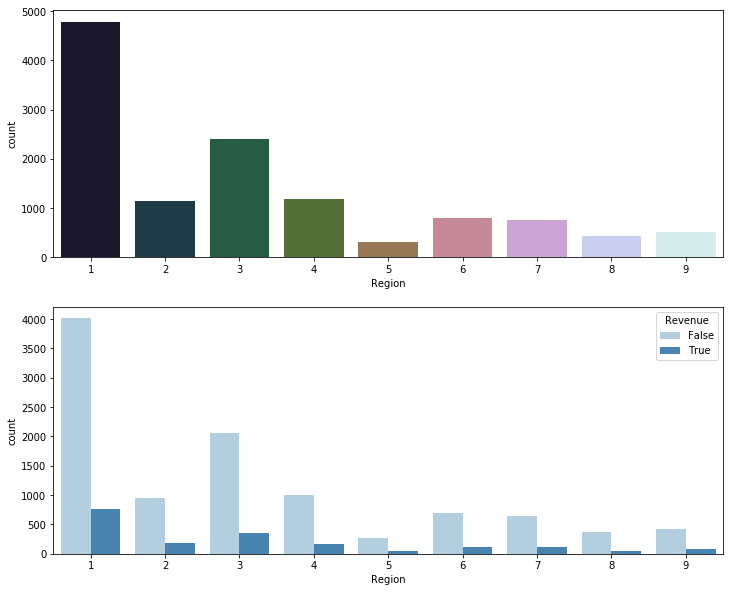

In [0]:
f,ax=plt.subplots(2,1,figsize=(12,10))
sns.countplot(data["Region"],palette="cubehelix",ax=ax[0]);
sns.countplot(data["Region"],hue=data["Revenue"],palette="Blues",ax=ax[1]);

Regions may influence the Revenue.


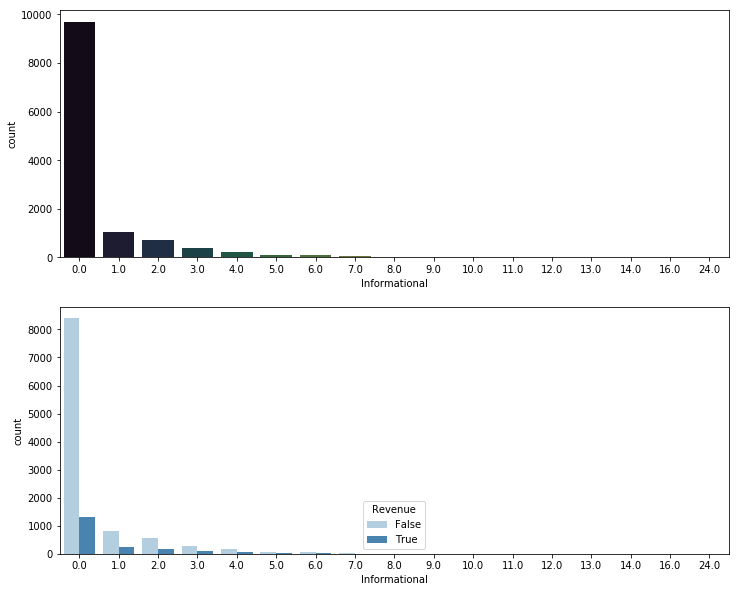

In [0]:
f,ax=plt.subplots(2,1,figsize=(12,10))
sns.countplot(data["Informational"],palette="cubehelix",ax=ax[0]);
sns.countplot(data["Informational"],hue=data["Revenue"],palette="Blues",ax=ax[1]);

If the user doesn't visit many informational web pages, he is more likely to not purchase.

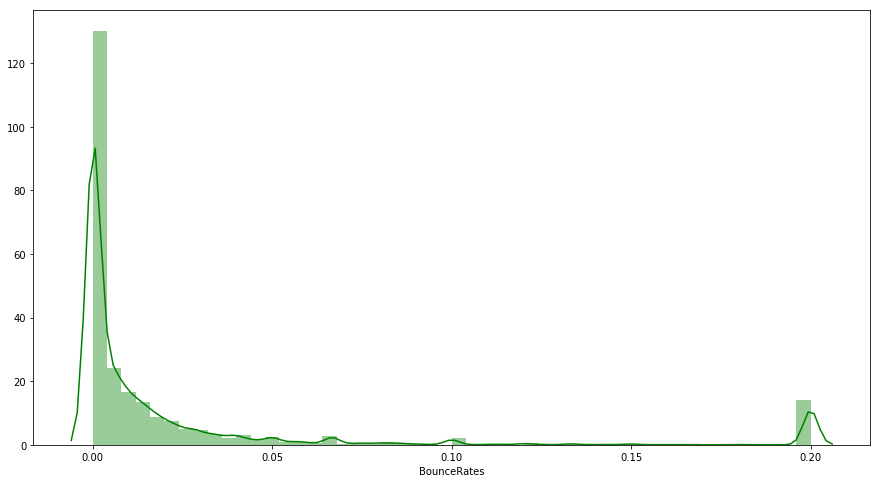

In [0]:
data["BounceRates"]=data["BounceRates"].fillna(0)
plt.figure(figsize=(15,8))
sns.distplot(data["BounceRates"],color="green");

Users tend to enter and leave different webpages.

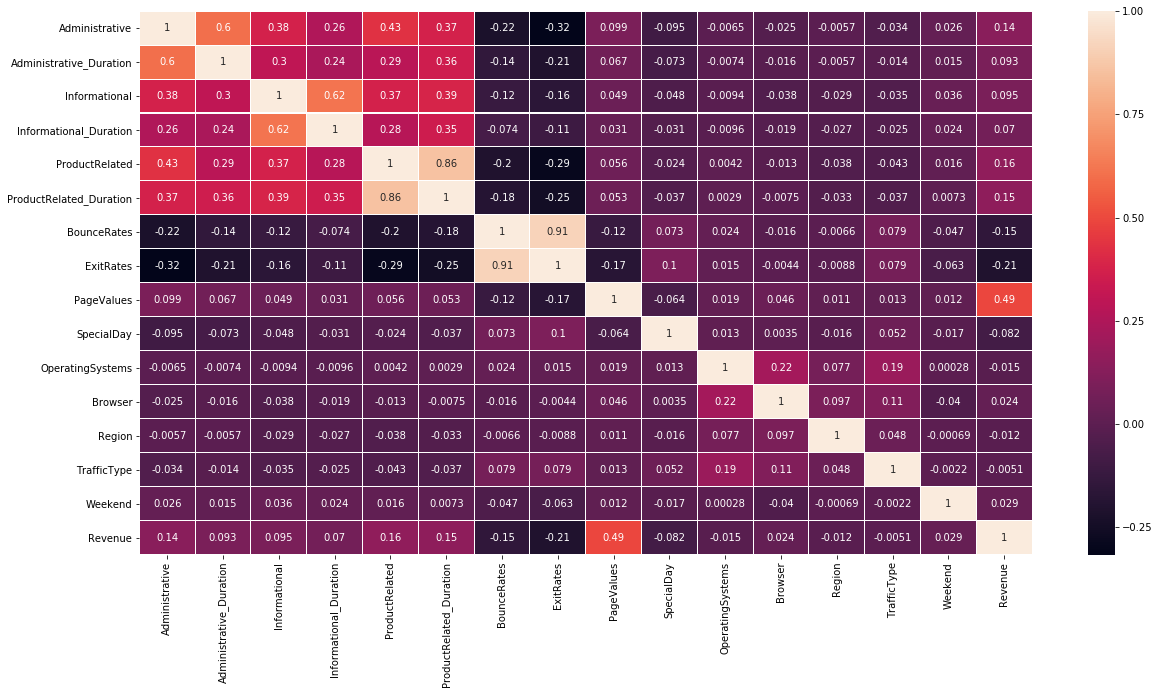

In [0]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=.05);



*   Bounce Rates and Exit Rates are strongly correlated
*   Product Related and Product Related Duration are strongly correlated
*   The higher the number of visited webpages of any type the longer the duration spent by a user on a page.
*   There is a positive correlation between Revenue and Page Values





In [0]:
def distplot(name):
    var = data[name]
    sns.distplot(var , fit=norm);
    
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(var)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('var distribution')
    
    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(var, plot=plt)
    plt.show()


 mu = 5.89 and sigma = 18.57



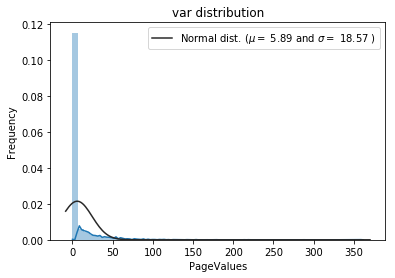

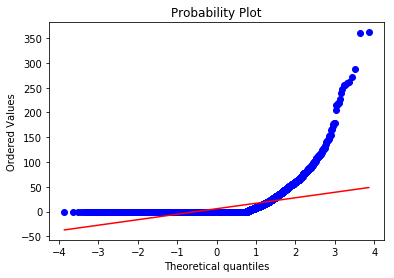

In [0]:
distplot("PageValues")

# Data cleaning and preprocessing

In [0]:
# Inputing Missing Values with 0

data.fillna(0, inplace = True)

# checking the no. of null values in data after imputing the missing values
data.isnull().sum().sum()

0

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
visitor_type=le.fit_transform(data["VisitorType"].values)
print(le.classes_)
visitor_type

['New_Visitor' 'Other' 'Returning_Visitor']


array([2, 2, 2, ..., 2, 2, 0])

In [0]:
weekend=le.fit_transform(data["Weekend"].values)
print(le.classes_)
weekend

[False  True]


array([0, 0, 0, ..., 1, 0, 1])

In [0]:
month=le.fit_transform(data["Month"].values)
print(le.classes_)
month

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']


array([2, 2, 2, ..., 7, 7, 7])

In [0]:
y=le.fit_transform(data["Revenue"])
y=pd.DataFrame(y,columns=["revenue"])
y.head()

,revenue
0,0
1,0
2,0
3,0
4,0


In [0]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [0]:
X=pd.concat([pd.DataFrame(visitor_type),pd.DataFrame(weekend),pd.DataFrame(month),data["BounceRates"],data["SpecialDay"],data["PageValues"], data["Administrative"], data["Administrative_Duration"],data["Informational"], data["Informational_Duration"], data["ProductRelated"], data["ProductRelated_Duration"], data["OperatingSystems"],data["Browser"],data["Region"],data["TrafficType"]],axis=1)
X.columns=["visitor_type","weekend","month","bouncerates","specialday","page_values","Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "OperatingSystems", "Browser", "Region", "TrafficType"]
X.head()

,visitor_type,weekend,month,bouncerates,specialday,page_values,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,OperatingSystems,Browser,Region,TrafficType
0,2,0,2,0.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1,1,1,1
1,2,0,2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,64.000000,2,2,1,2
2,2,0,2,0.20,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,-1.000000,4,1,9,3
3,2,0,2,0.05,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.666667,3,2,2,4
4,2,1,2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,10.0,627.500000,3,3,1,4


# Training and testing some machine learning models

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=31)

Possible models for classification:
*   Linear Classifiers: Logistic Regression, Naive Bayes Classifier
*   Nearest Neighbor
*   Neural Networks
*   Support Vector Machines
*   Decision Trees
*   Boosted Trees
*   Random Forest

We'll use :

* Naive Bayes: fast, two-class classification
* Nearest Neighbor: accurate, two-class classification
* RandomForest: accurate, two-class classification



## Naive Bayes



In [0]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model_nb=nb.fit(X_train,y_train)
model_nb

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred=model_nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8475263584752636

## K Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
model_knn= knn.fit(X_train,y_train)
model_knn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred=model_knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8507704785077048

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.897404703974047

# Training and testing a deep a learning model

## multi-layer perceptron

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(16, activation='relu', input_shape=(16,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0826 09:55:11.044193 140664718391168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 09:55:11.096715 140664718391168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 09:55:11.106131 140664718391168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

W0826 09:55:31.338970 140664718391168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 09:55:31.377313 140664718391168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0826 09:55:31.383847 140664718391168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0826 09:55:31.629386 140664718391168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Epoch 1/20
9864/9864 [==============================] - 13s 1ms/step - loss: 0.2940 - acc: 0.8839
Epoch 2/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2587 - acc: 0.8948
Epoch 3/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2532 - acc: 0.8975
Epoch 4/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2501 - acc: 0.8988
Epoch 5/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2472 - acc: 0.8993
Epoch 6/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2451 - acc: 0.9001
Epoch 7/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2449 - acc: 0.9014
Epoch 8/20
9864/9864 [==============================] - 13s 1ms/step - loss: 0.2429 - acc: 0.9019
Epoch 9/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2441 - acc: 0.9027
Epoch 10/20
9864/9864 [==============================] - 12s 1ms/step - loss: 0.2397 - acc: 0.9019
Epoch 11/20
9864/98

In [0]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2466/2466 [==============================] - 0s 32us/step
[0.2648489562913908, 0.8888888888888888]


## Neural Network



In [0]:
from sklearn.neural_network import MLPClassifier


In [0]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [0]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)
mlpc

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8957826439578265